Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading file

In [2]:
df=pd.read_csv('D:\AI-ML\loan club case study\loan.csv', encoding='ansi',dtype='unicode')

Exploring data fields present in file

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


Checking and removing duplicate entires on the basis of id if any

In [5]:
df['id'].nunique()

39717

No duplicate entries present on the basis of id

Proceeding with further analysis to find missing values.

Analyzing columns having missing values in terms of percentage, will go ahead and drop columns having high missing values percentage from dataframe for further analysis.

In [6]:
pd.options.display.max_rows = 200
df.isnull().sum(axis=0)/df.shape[0]*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

As we can see above, most of the column data entries are missing null values i.e. null value is 100%.

Dropping columns having all null values present in dataframe for further analysis.

In [7]:
df_mod = df.dropna(how='all', axis=1)

Dropping two more columns, column 'mths_since_last_record' and 'next_pymnt_d' having missing null value percentage as 92.99 and 97.13 respectively as it is high.

In [8]:
df_mod=df_mod.drop(columns=['mths_since_last_record','next_pymnt_d'])
df_mod.shape

(39717, 55)

Analyzing row wise missing null values, but will not remove rows having high missing values as the other field of that row may give us some insight.

In [9]:
miss_row=df_mod.isnull().sum(axis=1)/df_mod.shape[1]*100

In [10]:
miss_row.describe()

count    39717.000000
mean         1.974790
std          1.399010
min          0.000000
25%          1.818182
50%          1.818182
75%          3.636364
max         10.909091
dtype: float64

Maximum percentage of missing values row wise is 10.9%, retaining all the rows.

Dropping rows in columwise analysis will help if it is required.

Checking unique values of 'loan_status' for all loans provided in the data

In [11]:
df_mod['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

*People who have loan status as 'Fully Paid' they are non defaulters.

*People who have loan status as 'Charged Off' they are the defaulters.

*People who have loan status as 'Current' they may either fall into 'Fully Paid' or 'Charged Off' at the end of their loan tenure

Filtering out people having loan status 'Current' as they may or may not default.

In [12]:
df_mod=df_mod[~(df_mod['loan_status']=='Current')]

In [13]:
df_mod['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [14]:
df_mod.shape

(38577, 55)

Dropping columns mentioned in 'RejectStats' worksheet of data dictionary file.

In addition, dropping some other columns that will not add value in further analysis, for e.g. 'member_id','sub_grade' and so on.

In [15]:
df_mod=df_mod.drop(columns=['member_id','loan_amnt','zip_code','title','dti','zip_code','addr_state','emp_length','policy_code','url','desc','sub_grade'])

In [16]:
df_mod.shape

(38577, 44)

In [17]:
pd.options.display.max_columns = 50
df_mod.head()

,id,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,4975,36 months,10.65%,162.87,B,NaN,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,INDIVIDUAL,0,0,0,0,0
1,1077430,2500,2500,60 months,15.27%,59.83,C,Ryder,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,INDIVIDUAL,0,0,0,0,0
2,1077175,2400,2400,36 months,15.96%,84.33,C,NaN,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,INDIVIDUAL,0,0,0,0,0
3,1076863,10000,10000,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,0,Feb-96,1,35,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,INDIVIDUAL,0,0,0,0,0
5,1075269,5000,5000,36 months,7.90%,156.46,A,Veolia Transportaton,RENT,36000,Source Verified,Dec-11,Fully Paid,n,wedding,0,Nov-04,3,NaN,9,0,7963,28.30%,12,f,0,0,5632.21,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0,INDIVIDUAL,0,0,0,0,0


Cleaning and converting columns such as term of loan, interest rate, in order to convert these columns into numeric for either int or float for further analysis.

In [18]:
df_mod['term']=df_mod['term'].apply(lambda x: x.replace('months',''))
df_mod['term'].head()

0     36 
1     60 
2     36 
3     36 
5     36 
Name: term, dtype: object

In [19]:
df_mod['int_rate']=df_mod['int_rate'].apply(lambda x: x.replace('%',''))
df_mod['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: object

In [20]:
df_mod['revol_util']=df_mod['revol_util'].astype('str')
df_mod['revol_util']=df_mod['revol_util'].apply(lambda x: x.replace('%',''))
df_mod['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
5    28.30
Name: revol_util, dtype: object

Copying dataframe to 'df_ccorr' as few modifications will be done for correlation matrix, 'df_mod' will be taken further for univariate and bivariate analysis.

In [21]:
df_corr=df_mod.copy(deep=True)

In [22]:
df_corr.head()

,id,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,4975,36,10.65,162.87,B,NaN,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,0,Jan-85,1,NaN,3,0,13648,83.70,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,INDIVIDUAL,0,0,0,0,0
1,1077430,2500,2500,60,15.27,59.83,C,Ryder,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,0,Apr-99,5,NaN,3,0,1687,9.40,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,INDIVIDUAL,0,0,0,0,0
2,1077175,2400,2400,36,15.96,84.33,C,NaN,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,0,Nov-01,2,NaN,2,0,2956,98.50,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,INDIVIDUAL,0,0,0,0,0
3,1076863,10000,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,0,Feb-96,1,35,10,0,5598,21,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,INDIVIDUAL,0,0,0,0,0
5,1075269,5000,5000,36,7.90,156.46,A,Veolia Transportaton,RENT,36000,Source Verified,Dec-11,Fully Paid,n,wedding,0,Nov-04,3,NaN,9,0,7963,28.30,12,f,0,0,5632.21,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0,INDIVIDUAL,0,0,0,0,0


Filtering columns that contains only numerical values for correlation matrix

In [23]:
df_corr=pd.DataFrame(df_corr,columns=['funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','delinq_2yrs','inq_last_6mnths','mths_since_last_delinq','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens'])

In [24]:
df_corr.shape

(38577, 30)

In [25]:
df_corr.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,delinq_2yrs,inq_last_6mnths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,4975,36,10.65,162.87,24000,0,NaN,NaN,3,0,13648,83.70,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,171.62,0,0,0,0,0,0
1,2500,2500,60,15.27,59.83,30000,0,NaN,NaN,3,0,1687,9.40,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,119.66,0,0,0,0,0,0
2,2400,2400,36,15.96,84.33,12252,0,NaN,NaN,2,0,2956,98.50,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,649.91,0,0,0,0,0,0
3,10000,10000,36,13.49,339.31,49200,0,NaN,35,10,0,5598,21,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,357.48,0,0,0,0,0,0
5,5000,5000,36,7.90,156.46,36000,0,NaN,NaN,9,0,7963,28.30,12,0,0,5632.21,5632.21,5000,632.21,0,0,0,161.03,0,0,0,0,0,0


Converting dtype of all columns from object to float

In [26]:
df_corr=df_corr.astype('float')

In [27]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   funded_amnt                 38577 non-null  float64
 1   funded_amnt_inv             38577 non-null  float64
 2   term                        38577 non-null  float64
 3   int_rate                    38577 non-null  float64
 4   installment                 38577 non-null  float64
 5   annual_inc                  38577 non-null  float64
 6   delinq_2yrs                 38577 non-null  float64
 7   inq_last_6mnths             0 non-null      float64
 8   mths_since_last_delinq      13672 non-null  float64
 9   open_acc                    38577 non-null  float64
 10  pub_rec                     38577 non-null  float64
 11  revol_bal                   38577 non-null  float64
 12  revol_util                  38527 non-null  float64
 13  total_acc                   385

In [28]:
df_corr.shape

(38577, 30)

In [29]:
df_corr.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,delinq_2yrs,inq_last_6mnths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,4975.0,36.0,10.65,162.87,24000.0,0.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,60.0,15.27,59.83,30000.0,0.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,0.0,0.0,0.0
2,2400.0,2400.0,36.0,15.96,84.33,12252.0,0.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0.0,0.0
3,10000.0,10000.0,36.0,13.49,339.31,49200.0,0.0,NaN,35.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,0.0,0.0,0.0,0.0,0.0
5,5000.0,5000.0,36.0,7.90,156.46,36000.0,0.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,0.0,0.0,0.0,0.0,0.0


Finding the correlation matrix to plot heatmap

In [30]:
corr=df_corr.corr()
corr

,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,delinq_2yrs,inq_last_6mnths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
funded_amnt,1.000000,0.956172,0.324893,0.304930,0.958035,0.264798,-0.031866,NaN,0.015969,0.175682,-0.050576,0.306501,0.067356,0.250551,NaN,NaN,0.898709,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,0.478448,NaN,NaN,NaN,NaN,-0.036995,NaN
funded_amnt_inv,0.956172,1.000000,0.343922,0.297473,0.905464,0.251981,-0.038171,NaN,0.073367,0.162738,-0.051470,0.286265,0.072202,0.242715,NaN,NaN,0.874730,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,0.469166,NaN,NaN,NaN,NaN,-0.041193,NaN
term,0.324893,0.343922,1.000000,0.440206,0.090456,0.043866,0.007270,NaN,0.038646,0.046162,0.010266,0.066411,0.065846,0.096168,NaN,NaN,0.305571,0.320900,0.200222,0.506258,0.012850,0.112806,0.037361,0.270192,NaN,NaN,NaN,NaN,0.014529,NaN
int_rate,0.304930,0.297473,0.440206,1.000000,0.277203,0.048899,0.158479,NaN,-0.054307,0.006022,0.098635,0.094179,0.467213,-0.046539,NaN,NaN,0.290661,0.284932,0.174717,0.521233,0.094319,0.128596,0.070013,0.174377,NaN,NaN,NaN,NaN,0.083027,NaN
installment,0.958035,0.905464,0.090456,0.277203,1.000000,0.267842,-0.019755,NaN,0.000268,0.172893,-0.045706,0.309501,0.093049,0.229860,NaN,NaN,0.858493,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,NaN,NaN,NaN,NaN,-0.033361,NaN
annual_inc,0.264798,0.251981,0.043866,0.048899,0.267842,1.000000,0.022229,NaN,-0.007442,0.156927,-0.017864,0.277374,0.016707,0.234534,NaN,NaN,0.256313,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,0.143242,NaN,NaN,NaN,NaN,-0.016224,NaN
delinq_2yrs,-0.031866,-0.038171,0.007270,0.158479,-0.019755,0.022229,1.000000,NaN,-0.567607,0.011649,0.007623,-0.054437,-0.042616,0.066994,NaN,NaN,-0.023130,-0.029608,-0.038447,0.023778,0.028772,0.012443,0.014077,-0.012511,NaN,NaN,NaN,NaN,0.003404,NaN
inq_last_6mnths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mths_since_last_delinq,0.015969,0.073367,0.038646,-0.054307,0.000268,-0.007442,-0.567607,NaN,1.000000,0.024901,0.059082,0.013988,0.107457,0.010119,NaN,NaN,0.012601,0.059891,0.015335,0.004817,-0.026357,-0.008611,-0.018862,0.007584,NaN,NaN,NaN,NaN,0.025681,NaN
open_acc,0.175682,0.162738,0.046162,0.006022,0.172893,0.156927,0.011649,NaN,0.024901,1.000000,0.000028,0.288055,-0.089923,0.687260,NaN,NaN,0.162141,0.152008,0.159997,0.123478,-0.018827,0.017241,0.006674,0.082396,NaN,NaN,NaN,NaN,0.005803,NaN


Correlation matrix consist of null values for some variables, removing all those fileds having 100% null values

In [31]:
corr.isnull().sum(axis=0)/corr.shape[0]*100

funded_amnt                    26.666667
funded_amnt_inv                26.666667
term                           26.666667
int_rate                       26.666667
installment                    26.666667
annual_inc                     26.666667
delinq_2yrs                    26.666667
inq_last_6mnths               100.000000
mths_since_last_delinq         26.666667
open_acc                       26.666667
pub_rec                        26.666667
revol_bal                      26.666667
revol_util                     26.666667
total_acc                      26.666667
out_prncp                     100.000000
out_prncp_inv                 100.000000
total_pymnt                    26.666667
total_pymnt_inv                26.666667
total_rec_prncp                26.666667
total_rec_int                  26.666667
total_rec_late_fee             26.666667
recoveries                     26.666667
collection_recovery_fee        26.666667
last_pymnt_amnt                26.666667
collections_12_m

In [32]:
corr=corr.drop(labels=['inq_last_6mnths','out_prncp','out_prncp_inv','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
              ,axis=1)

In [33]:
corr=corr.drop(labels=['inq_last_6mnths','out_prncp','out_prncp_inv','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
              ,axis=0)

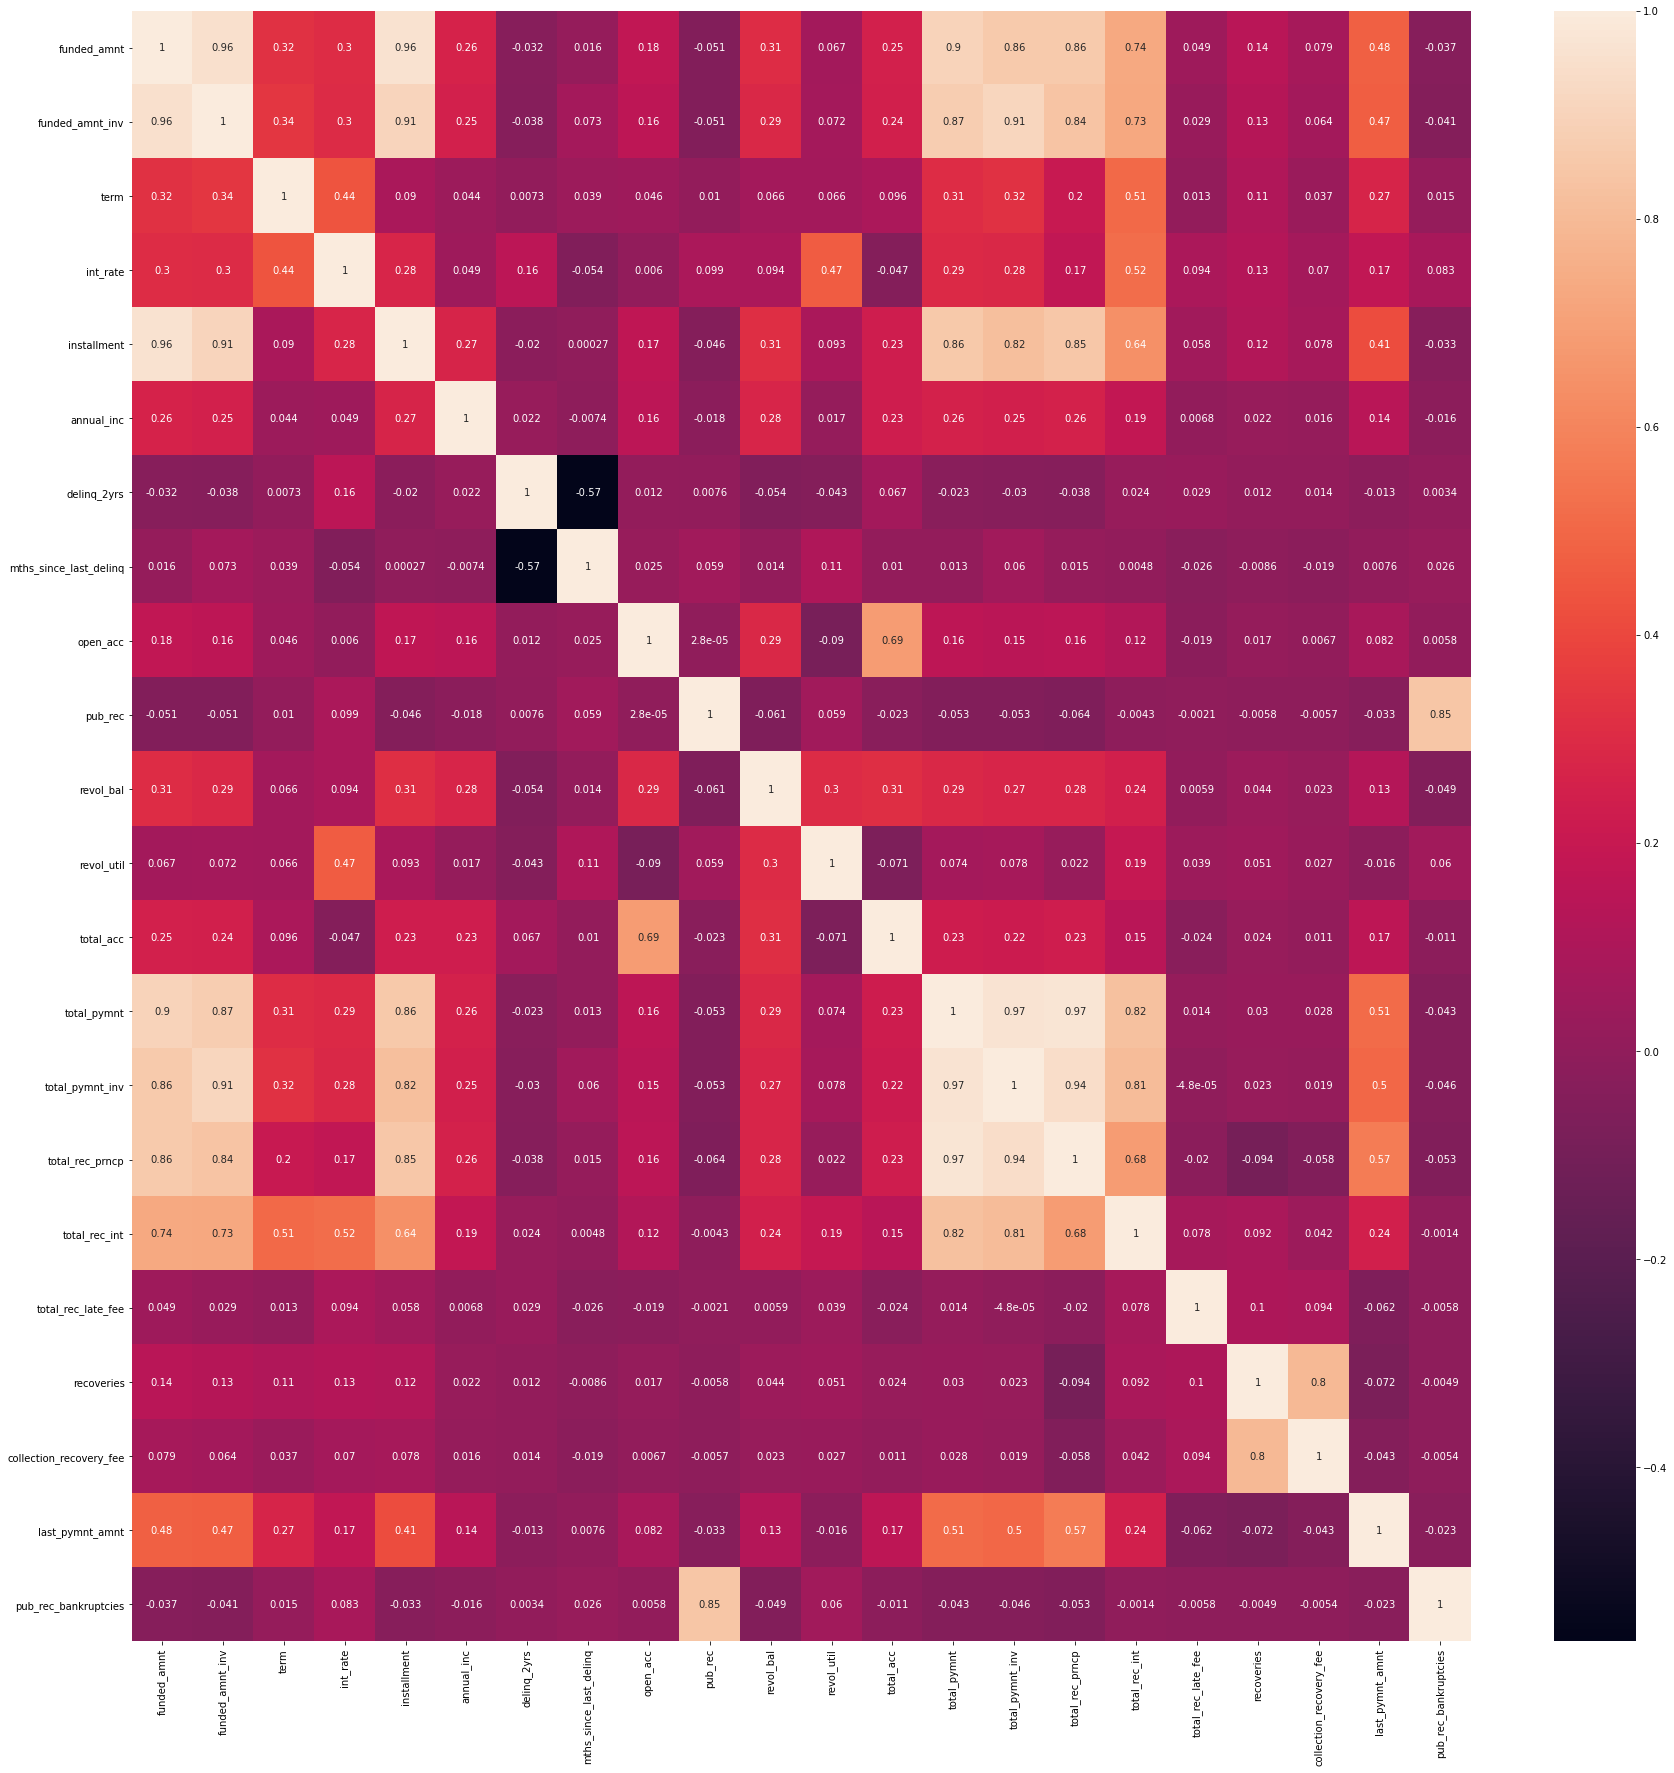

In [34]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(corr, annot=True)

Above Heatmap can be analyzed for multivariate analysis for both high positive and negative correlated variables.

Let us move on for analyzing other variables with loan status

In [35]:
df_nd=df_mod[df_mod['loan_status']=='Fully Paid']
df_d=df_mod[df_mod['loan_status']=='Charged Off']
nd=df_nd.shape[0]/df_mod.shape[0]
d=df_d.shape[0]/df_mod.shape[0]
print('% of defaulters between 2007-2011',round(d,2)*100)
print('% of non-defaulters between 2007-2011',round(nd,2)*100)

% of defaulters between 2007-2011 15.0
% of non-defaulters between 2007-2011 85.0


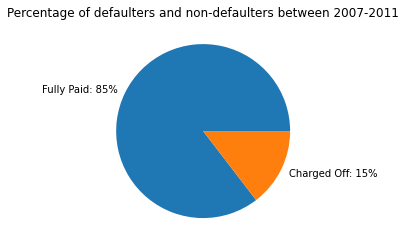

In [36]:
a=df_mod['loan_status'].value_counts(1)*100
plt.pie(a, labels=['Fully Paid: 85%','Charged Off: 15%'])
plt.title('Percentage of defaulters and non-defaulters between 2007-2011')
plt.show()

Analyzing 'total funded amount' and 'total funded amount committed' by the investors with respect to loan status

In [37]:
df_mod['funded_amnt']=df_mod['funded_amnt'].astype('float')
df_mod['funded_amnt'].describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [38]:
df_mod['funded_amnt_inv']=df_mod['funded_amnt_inv'].astype('float')
df_mod['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

Bucketing both 'total funded amount' and 'total funded amount committed' for variable as they are continuous variables

In [39]:
def amnt_bin(x):
    if x>=0 and x<=5000:
        return "0-5000"
    elif x>5000 and x<=10000:
        return "5000-10000"
    elif x>10000 and x<=15000:
        return "10000-15000"
    elif x>15000 and x<=20000:
        return "15000-20000"
    elif x>20000 and x<=25000:
        return "20000-25000"
    elif x>25000 and x<=30000:
        return "25000-30000"
    elif x>30000 and x<=35000:
        return "30000-35000"

In [40]:
df_mod['funded_amnt_rng']=df_mod['funded_amnt'].apply(lambda x: amnt_bin(x))
df_mod['funded_amnt_inv_rng']=df_mod['funded_amnt_inv'].apply(lambda x: amnt_bin(x))

'filter_func' function for filtering out data having loan status as 'Fully Paid' and 'Charged Off'

In [41]:
def filter_func(dfx,y,x):
    dfx=dfx[dfx[y]==x]
    return dfx

'calc' function for calculating percentage and number for both category 'Fully Paid' and 'Charged Off'

In [42]:
def calc(y):
    l1=[]
    l2=[]
    l3=[]
    l4=[]
    l5=[]
    l6=[]
    filter_con=df_mod[y].unique()
    for i in filter_con:
        df_mod_filter=filter_func(df_mod,y,i)
        c=df_mod_filter.shape[0]
        c1=df_mod_filter[df_mod_filter['loan_status']=='Fully Paid'].shape[0]
        c2=df_mod_filter[df_mod_filter['loan_status']=='Charged Off'].shape[0]
        nd=df_mod_filter[df_mod_filter['loan_status']=='Fully Paid'].shape[0]*100/c
        d=df_mod_filter[df_mod_filter['loan_status']=='Charged Off'].shape[0]*100/c
        l1.append(i)
        l2.append(round(nd,2))
        l3.append(round(d,2))
        l4.append(c)
        l5.append(c1)
        l6.append(c2)
    df_calc=pd.DataFrame(list(zip(l1,l2,l3,l4,l5,l6)),columns=[y,'non_defaulters','defaulters',
                                                        'total_people','num_of_non_defaulters','num_of_defaulters'])
    return df_calc

Analyzing defaulters as per total funded amount

In [43]:
df_famnt=calc('funded_amnt_rng')
df_famnti=calc('funded_amnt_inv_rng')
df_famnt

,funded_amnt_rng,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,0-5000,86.07,13.93,9555,8224,1331
1,5000-10000,87.20,12.80,12997,11333,1664
2,10000-15000,86.12,13.88,7870,6778,1092
3,20000-25000,80.76,19.24,2547,2057,490
4,30000-35000,75.81,24.19,616,467,149
5,25000-30000,81.13,18.87,652,529,123
6,15000-20000,82.07,17.93,4340,3562,778


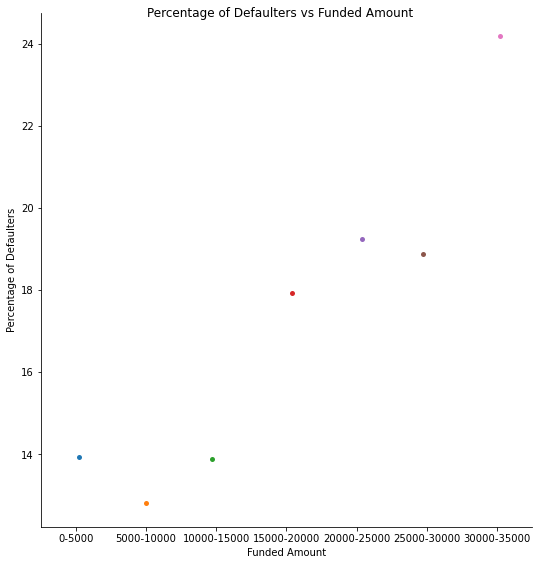

In [44]:
category_order = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000-35000']
g=sns.catplot(x='funded_amnt_rng', y='defaulters',data=df_famnt, order=category_order)
g.fig.set_size_inches(8,8)
g.fig.suptitle('Percentage of Defaulters vs Funded Amount')
g.set(xlabel='Funded Amount', ylabel='Percentage of Defaulters')

In [45]:
df_famnti

,funded_amnt_inv_rng,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,0-5000,85.24,14.76,10701,9121,1580
1,5000-10000,87.25,12.75,12757,11131,1626
2,10000-15000,86.23,13.77,7617,6568,1049
3,15000-20000,82.10,17.90,3984,3271,713
4,20000-25000,82.04,17.96,2316,1900,416
5,30000-35000,76.48,23.52,574,439,135
6,25000-30000,82.80,17.20,628,520,108


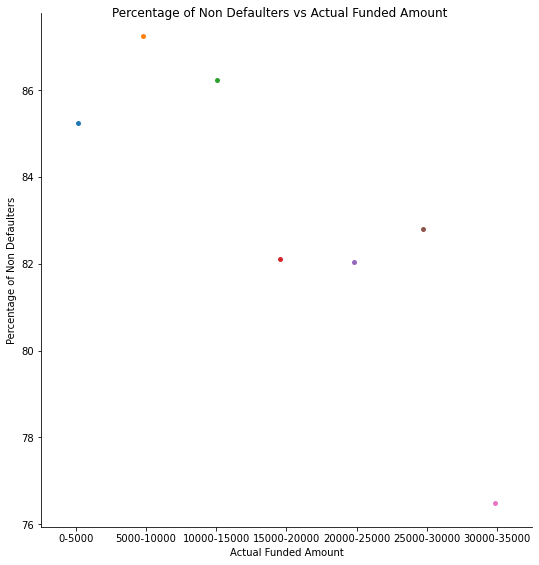

In [46]:
category_order = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000-35000']
g=sns.catplot(x='funded_amnt_inv_rng', y='non_defaulters',data=df_famnti, order=category_order)
g.fig.set_size_inches(8,8)
g.fig.suptitle('Percentage of Non Defaulters vs Actual Funded Amount')
g.set(xlabel='Actual Funded Amount', ylabel='Percentage of Non Defaulters')

From above plots, it can be observed that as funded amount or actual funded amount increases, there is a increased chance of people defaulting loans.

Analyzing term of loan with respect to defaulters and non-defaulters percentage

In [47]:
df_trm=calc('term')
df_trm

,term,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,36,88.91,11.09,29096,25869,3227
1,60,74.69,25.31,9481,7081,2400


[Text(0.5, 0, 'Loan Term'), Text(0, 0.5, 'Percentage of Non Defaulters')]

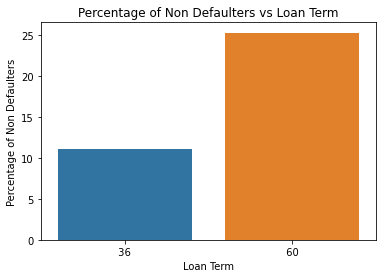

In [48]:
g=sns.barplot(data=df_trm,x="term",y="defaulters")
g.set_title('Percentage of Non Defaulters vs Loan Term')
g.set(xlabel='Loan Term', ylabel='Percentage of Non Defaulters')

In [49]:
df_mod['int_rate']=df_mod['int_rate'].astype('float')

In [50]:
df_mod['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [51]:
def bin_int(x):
    if x>=5 and x<=10:
        return "5-10"
    elif x>10 and x<=15:
        return "10-15"
    elif x>15 and x<=20:
        return "15-20"
    elif x>20 and x<=25:
        return "20-25"

In [52]:
df_mod['int_rate']=df_mod['int_rate'].apply(lambda x: bin_int(x))

In [53]:
df_intr=calc('int_rate')
df_intr

,int_rate,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,10-15,85.18,14.82,18265,15558,2707
1,15-20,75.17,24.83,7226,5432,1794
2,5-10,93.26,6.74,12316,11486,830
3,20-25,61.56,38.44,770,474,296


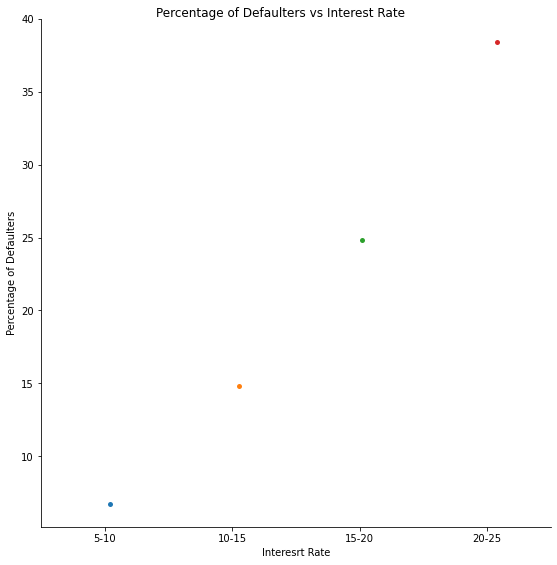

In [54]:
category_order = ['5-10', '10-15', '15-20', '20-25']
g=sns.catplot(x='int_rate', y='defaulters',data=df_intr, order=category_order)
g.fig.set_size_inches(8,8)
g.fig.suptitle('Percentage of Defaulters vs Interest Rate')
g.set(xlabel='Interesrt Rate', ylabel='Percentage of Defaulters')

It can be observed that as interest rate increases, percentage of defaulters increases linearly

In [55]:
df_mod['installment']=df_mod['installment'].astype('float')
df_mod['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [56]:
def bin_inst(x):
    if x>=0 and x<=350:
        return "0-350"
    elif x>350 and x<=700:
        return "350-700"
    elif x>700 and x<=1050:
        return "700-1050"
    elif x>1050 and x<=1400:
        return "1050-1400"

In [57]:
df_mod['installment']=df_mod['installment'].apply(lambda x: bin_inst(x))

In [58]:
df_inst=calc('installment')

In [59]:
df_inst

,installment,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,0-350,86.21,13.79,24850,21424,3426
1,350-700,84.20,15.80,11327,9537,1790
2,700-1050,82.26,17.74,2193,1804,389
3,1050-1400,89.37,10.63,207,185,22


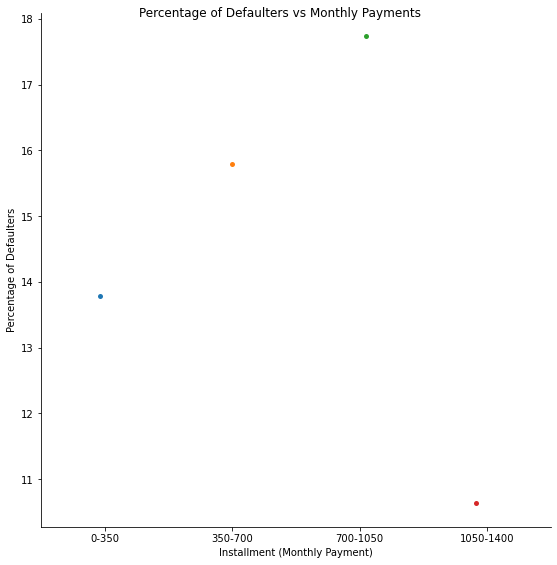

In [60]:
g=sns.catplot(x='installment', y='defaulters',data=df_inst)
g.fig.set_size_inches(8,8)
g.fig.suptitle('Percentage of Defaulters vs Monthly Payments')
g.set(xlabel='Installment (Monthly Payment)', ylabel='Percentage of Defaulters')

It can be observed from the above plot, as 'Monthly payment (Installment)' increases, the number of defaulters will increase, except for the last bin as number of samples are less in last bin. It may not give a clear insight.

In [61]:
df_mod['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [62]:
df_grade=calc('grade')
df_grade

,grade,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,B,87.79,12.21,11675,10250,1425
1,C,82.81,17.19,7834,6487,1347
2,A,94.01,5.99,10045,9443,602
3,E,73.15,26.85,2663,1948,715
4,F,67.32,32.68,976,657,319
5,D,78.01,21.99,5085,3967,1118
6,G,66.22,33.78,299,198,101


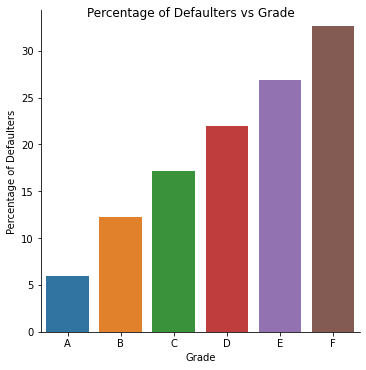

In [63]:
category_order = ['A', 'B', 'C', 'D','E','F']
g=sns.catplot(x='grade', y='defaulters',data=df_grade, kind='bar',order=category_order)
g.fig.set_size_inches(5,5)
g.fig.suptitle('Percentage of Defaulters vs Grade')
g.set(xlabel='Grade', ylabel='Percentage of Defaulters')

It can be observed form above plot the as the Grade decreases i.e. people working in lower grades are more likely to default

In [64]:
df_mod['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [65]:
df_home=calc('home_ownership')
df_home

,home_ownership,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,RENT,84.64,15.36,18480,15641,2839
1,OWN,85.11,14.89,2975,2532,443
2,MORTGAGE,86.33,13.67,17021,14694,2327
3,OTHER,81.63,18.37,98,80,18
4,NONE,100.00,0.00,3,3,0


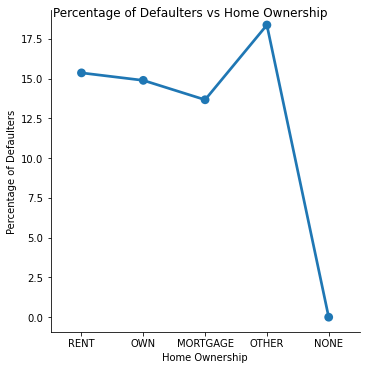

In [66]:
g=sns.catplot(x='home_ownership', y='defaulters',data=df_home, kind='point')
g.fig.set_size_inches(5,5)
g.fig.suptitle('Percentage of Defaulters vs Home Ownership')
g.set(xlabel='Home Ownership', ylabel='Percentage of Defaulters')

It can be observed from the above plot that, people who have 'NONE' type of home ownership default less whereas 'OTHER'  type of home ownership default more, there is not a significant difference between order follows as 'RENT' then 'OWN' then 'MORTGAGE'

In [67]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [68]:
df_ver=calc('verification_status')
df_ver

,verification_status,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,Verified,83.20,16.80,12206,10155,2051
1,Source Verified,85.18,14.82,9677,8243,1434
2,Not Verified,87.17,12.83,16694,14552,2142


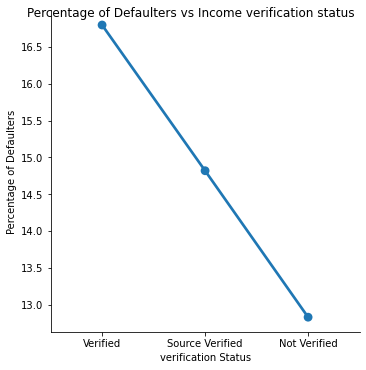

In [69]:
g=sns.catplot(x='verification_status', y='defaulters',data=df_ver, kind='point')
g.fig.set_size_inches(5,5)
g.fig.suptitle('Percentage of Defaulters vs Income verification status')
g.set(xlabel='verification Status', ylabel='Percentage of Defaulters')

It can be observed from above plot, strangely people whose income verification status is not verified are less likely to default as compared to people whose income or income source is verified.

In [70]:
df_mod['pymnt_plan'].unique()

array(['n'], dtype=object)

Payment plan is not put into place for anyone

In [71]:
df_mod['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [72]:
df_pur=calc('purpose')
df_pur

,purpose,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,credit_card,89.22,10.78,5027,4485,542
1,car,89.33,10.67,1499,1339,160
2,small_business,72.92,27.08,1754,1279,475
3,other,83.62,16.38,3865,3232,633
4,wedding,89.63,10.37,926,830,96
5,debt_consolidation,84.67,15.33,18055,15288,2767
6,home_improvement,87.93,12.07,2875,2528,347
7,major_purchase,89.67,10.33,2150,1928,222
8,medical,84.43,15.57,681,575,106
9,moving,84.03,15.97,576,484,92


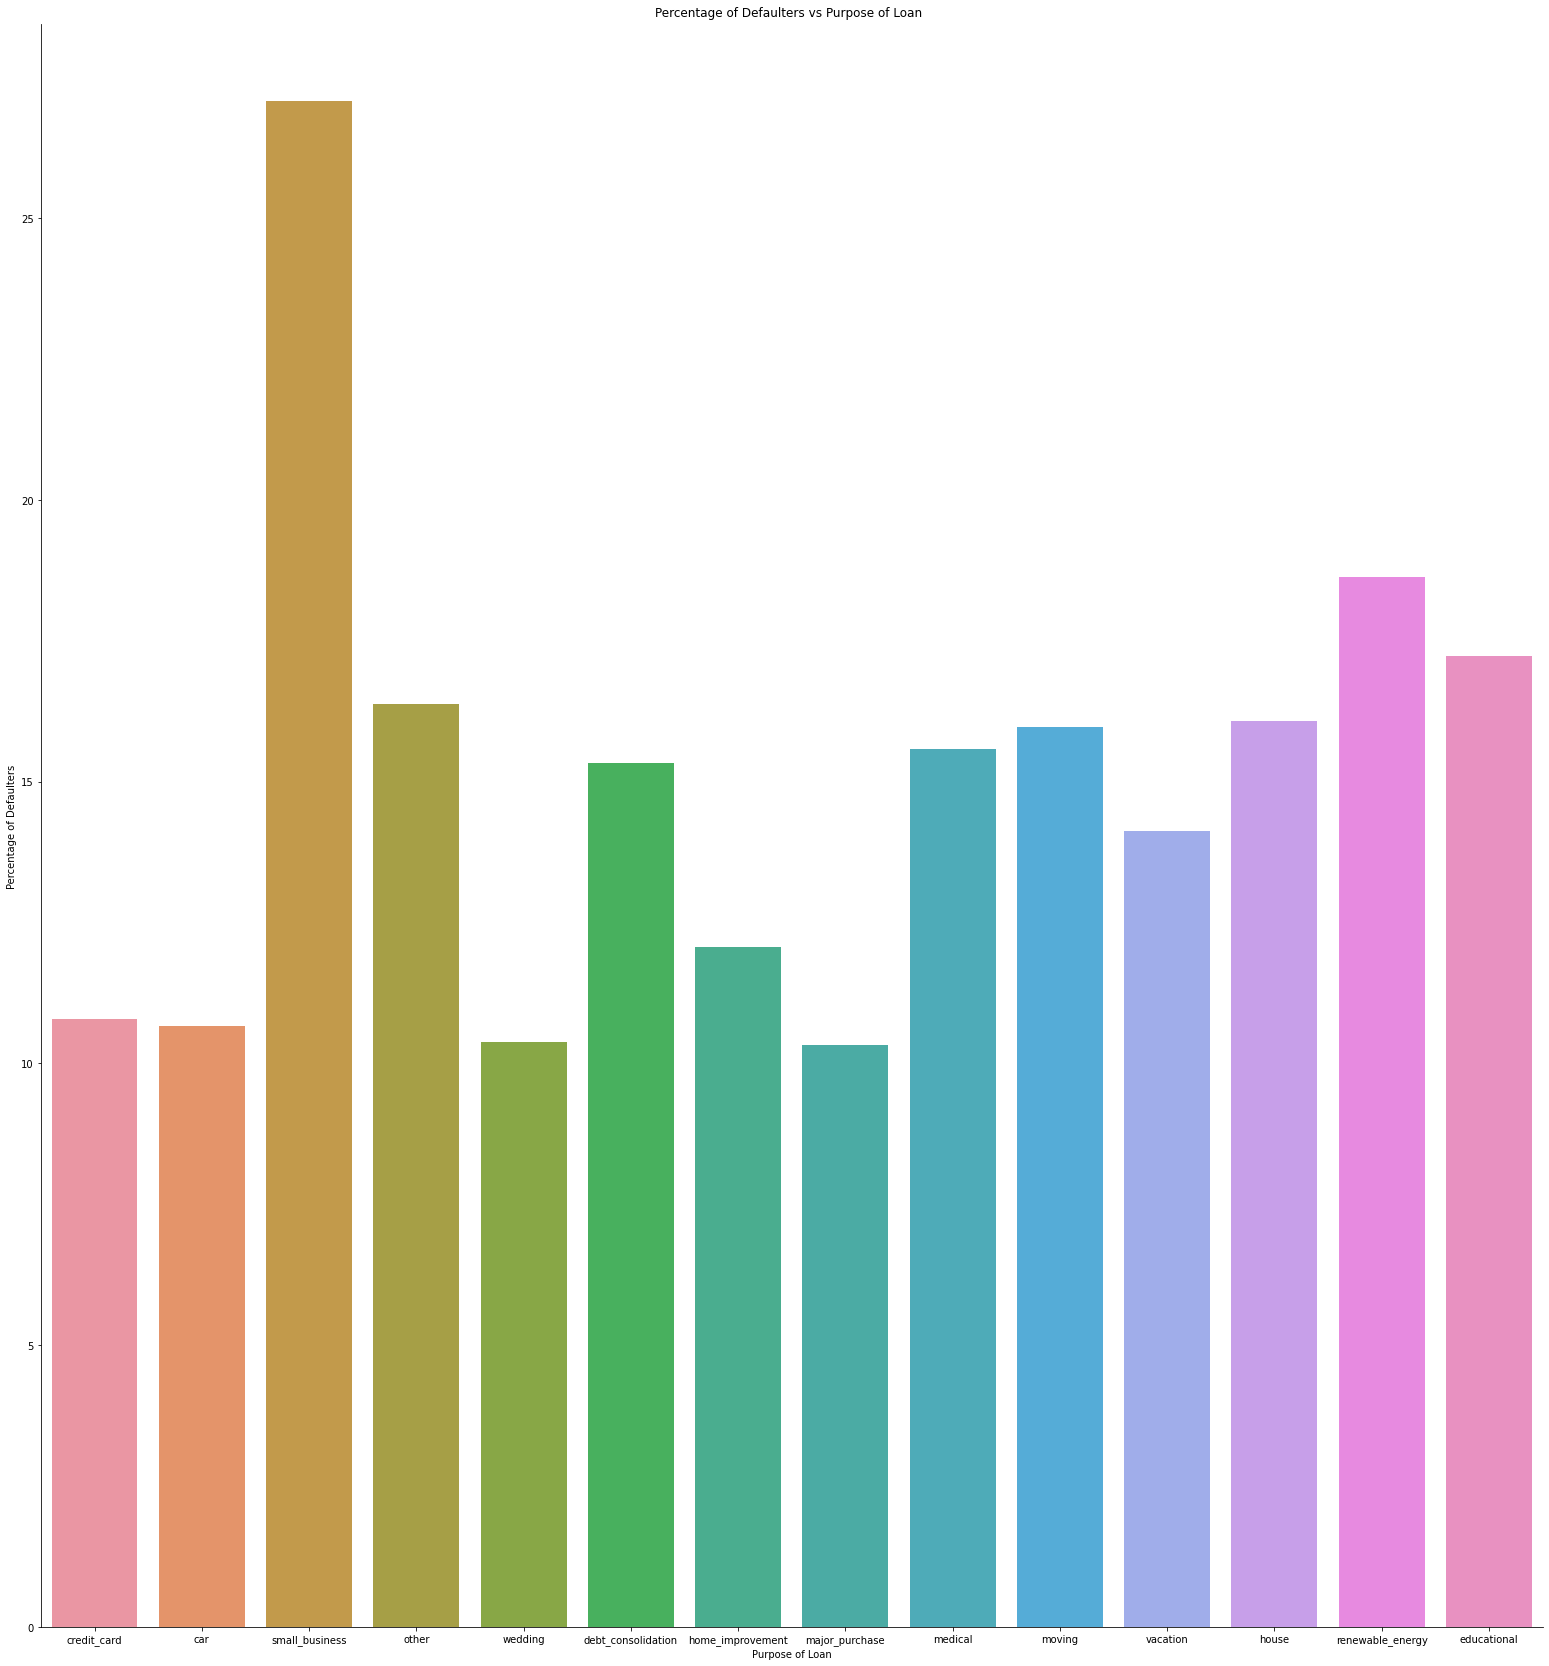

In [73]:
g=sns.catplot(x='purpose', y='defaulters',data=df_pur, kind='bar')
g.fig.set_size_inches(25,25)
g.fig.suptitle('Percentage of Defaulters vs Purpose of Loan')
g.set(xlabel='Purpose of Loan', ylabel='Percentage of Defaulters')

It can be observed from the above graphs that people who take loan for small business purpose are most likely to default loans as the business may or may not has that potential.

In [74]:
df_mod['annual_inc']=df_mod['annual_inc'].astype('float')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_mod['annual_inc'].describe()

count     38577.000
mean      68777.974
std       64218.682
min        4000.000
25%       40000.000
50%       58868.000
75%       82000.000
max     6000000.000
Name: annual_inc, dtype: float64

In [75]:
def annual_inc(x):
    if x>=0 and x<=1000000:
        return "0-10L"
    elif x>1000000 and x<=2000000:
        return "10L-20L"
    elif x>2000000 and x<=3000000:
        return "20L-30L"
    elif x>3000000 and x<=4000000:
        return "30L-40L"
    elif x>4000000 and x<=5000000:
        return "40L-50L"
    elif x>5000000 and x<=6000000:
        return "50L-60L"

In [76]:
df_mod['annual_inc_rng']=df_mod['annual_inc'].apply(lambda x: annual_inc(x))

In [77]:
df_mod['annual_inc_rng']

0        0-10L
1        0-10L
2        0-10L
3        0-10L
5        0-10L
         ...  
39712    0-10L
39713    0-10L
39714    0-10L
39715    0-10L
39716    0-10L
Name: annual_inc_rng, Length: 38577, dtype: object

In [78]:
df_anninc=calc('annual_inc_rng')

In [79]:
df_anninc

,annual_inc_rng,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,0-10L,85.410,14.590,38563,32937,5626
1,10L-20L,90.910,9.090,11,10,1
2,30L-40L,100.000,0.000,1,1,0
3,50L-60L,100.000,0.000,1,1,0
4,20L-30L,100.000,0.000,1,1,0


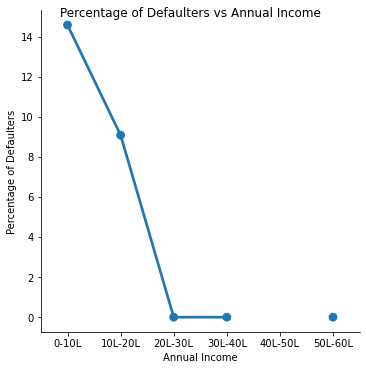

In [80]:
category_order = ['0-10L', '10L-20L', '20L-30L', '30L-40L','40L-50L','50L-60L']
g=sns.catplot(x='annual_inc_rng', y='defaulters',data=df_anninc, kind='point',order=category_order)
g.fig.set_size_inches(5,5)
g.fig.suptitle('Percentage of Defaulters vs Annual Income')
g.set(xlabel='Annual Income', ylabel='Percentage of Defaulters')

In [81]:
df_mod['delinq_2yrs'].unique()

array(['0', '2', '3', '1', '4', '6', '5', '8', '7', '9', '11'],
      dtype=object)

In [82]:
df_delinq=calc('delinq_2yrs')
df_delinq

,delinq_2yrs,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,0,85.650,14.350,34386,29450,4936
1,2,80.680,19.320,673,543,130
2,3,83.490,16.510,212,177,35
3,1,84.190,15.810,3207,2700,507
4,4,78.330,21.670,60,47,13
5,6,90.000,10.000,10,9,1
6,5,85.710,14.290,21,18,3
7,8,50.000,50.000,2,1,1
8,7,75.000,25.000,4,3,1
9,9,100.000,0.000,1,1,0


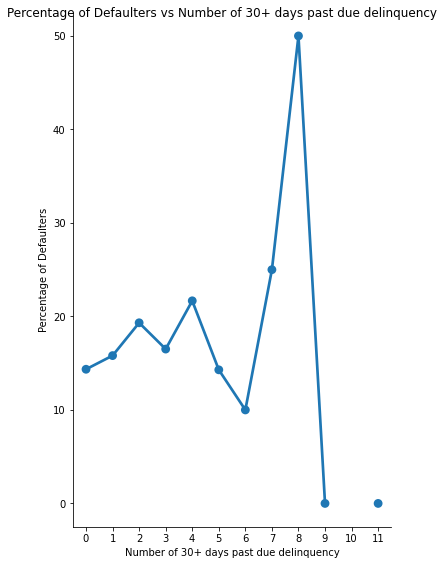

In [83]:
category_order = ['0','1','2','3','4','5','6','7','8','9','10','11']
g=sns.catplot(x='delinq_2yrs', y='defaulters',data=df_delinq, kind='point',order=category_order)
g.fig.set_size_inches(5,8)
g.fig.suptitle('Percentage of Defaulters vs Number of 30+ days past due delinquency')
g.set(xlabel='Number of 30+ days past due delinquency', ylabel='Percentage of Defaulters')

In [84]:
df_mod['inq_last_6mths'].unique()

array(['1', '5', '2', '3', '0', '4', '6', '7', '8'], dtype=object)

In [85]:
df_inq=calc('inq_last_6mths')
df_inq

,inq_last_6mths,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,1,84.270,15.730,10660,8983,1677
1,5,80.560,19.440,144,116,28
2,2,83.320,16.680,5654,4711,943
3,3,79.250,20.750,2983,2364,619
4,0,87.810,12.190,18709,16429,2280
5,4,83.860,16.140,316,265,51
6,6,74.600,25.400,63,47,16
7,7,70.590,29.410,34,24,10
8,8,78.570,21.430,14,11,3


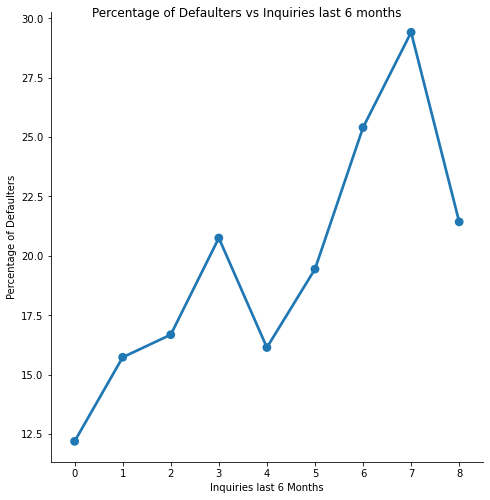

In [86]:
cat_order=['0','1','2','3','4','5','6','7','8']
g=sns.catplot(x='inq_last_6mths', y='defaulters',data=df_inq, kind='point', order=cat_order)
g.fig.set_size_inches(7,7)
g.fig.suptitle('Percentage of Defaulters vs Inquiries last 6 months')
g.set(xlabel='Inquiries last 6 Months', ylabel='Percentage of Defaulters')

In [87]:
df_mod['open_acc']=df_mod['open_acc'].astype('int')
df_mod['open_acc'].unique()
df_mod['open_acc'].describe()

count   38577.000
mean        9.275
std         4.402
min         2.000
25%         6.000
50%         9.000
75%        12.000
max        44.000
Name: open_acc, dtype: float64

In [88]:
def bin_openacc(x):
    if x>=0 and x<=5:
        return "0-5"
    elif x>5 and x<=10:
        return "5-10"
    elif x>10 and x<=15:
        return "10-15"
    elif x>15 and x<=20:
        return "15-20"
    elif x>20 and x<=25:
        return "20-25"
    elif x>25 and x<=30:
        return "25-30"
    elif x>30 and x<=35:
        return "30-35"
    elif x>35 and x<=40:
        return "35-40"
    elif x>40 and x<=45:
        return "40-45"

In [89]:
df_mod['open_acc_rng']=df_mod['open_acc'].apply(lambda x: bin_openacc(x))

In [90]:
df_mod['open_acc_rng'].unique()

array(['0-5', '5-10', '10-15', '15-20', '25-30', '20-25', '30-35',
       '35-40', '40-45'], dtype=object)

In [91]:
df_openacc=calc('open_acc_rng')

In [92]:
df_openacc

,open_acc_rng,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,0-5,84.300,15.700,7477,6303,1174
1,5-10,85.610,14.390,18273,15644,2629
2,10-15,85.680,14.320,9292,7961,1331
3,15-20,86.600,13.400,2805,2429,376
4,25-30,79.630,20.370,108,86,22
5,20-25,85.330,14.670,593,506,87
6,30-35,68.180,31.820,22,15,7
7,35-40,75.000,25.000,4,3,1
8,40-45,100.000,0.000,3,3,0


C:\Users\visha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\visha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='defaulters', ylabel='Density'>

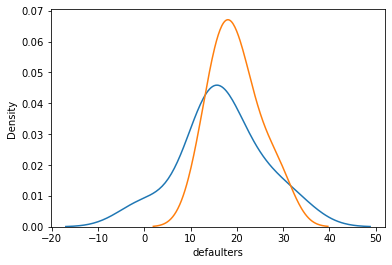

In [113]:
cat_order=['5-10','10-15','15-20','20-25','25-30','30-35','40-45']
sns.distplot(df_openacc['defaulters'], hist=False)
sns.distplot(df_inq['defaulters'], hist=False)
#g.fig.set_size_inches(7,7)
#g.fig.suptitle('Percentage of Defaulters vs Number of LOC')
#g.set(xlabel='Number of LOC', ylabel='Percentage of Defaulters')

In [95]:
df_mod['pub_rec'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [96]:
df_pubrec=calc('pub_rec')
df_pubrec

,pub_rec,non_defaulters,defaulters,total_people,num_of_non_defaulters,num_of_defaulters
0,0,85.870,14.130,36507,31347,5160
1,1,77.300,22.700,2013,1556,457
2,2,79.170,20.830,48,38,10
3,3,100.000,0.000,7,7,0
4,4,100.000,0.000,2,2,0


C:\Users\visha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='non_defaulters'>

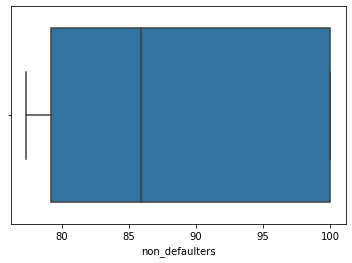

In [106]:
sns.boxplot(df_pubrec['non_defaulters'])

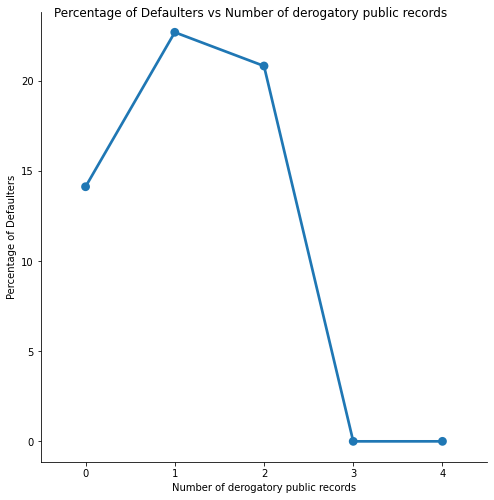

In [105]:
g=sns.catplot(x='pub_rec', y='defaulters',data=df_pubrec, kind='point')
g.fig.set_size_inches(7,7)
g.fig.suptitle('Percentage of Defaulters vs Number of derogatory public records')
g.set(xlabel='Number of derogatory public records', ylabel='Percentage of Defaulters')